# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *K*

**Names:**

* *Mathieu Sauser*
* *Luca Mouchel*
* *Heikel Jebali*
* *Jérémy Chaverot*

---

#### Instructions

*This is a template for part 3 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import json
import epidemics_helper
import numpy as np

In [2]:
'function that load the graph'
def load():
    with open('../data/nyc_augmented_network.json', 'r') as f:
        data = json.load(f)
    return nx.node_link_graph(data)

In [3]:
'function that given a node, a day (time) and an epidemic (sir),'
' looks up the state of the node at the given time and assigns it a color'
'(green = susceptible, red = infected, blue = recovered)'
def color(node, time, sir):
    status = sir.get_node_status(node, time)
    if status == 0: #susceptible
        return "green"
    elif status == 1: #infected
        return "red"
    else: #recovered
        return "blue"

In [4]:
'function that iterate over all nodes and ask color the color of each node at a certain time'
'return a list of the size of the number of nodes with the color of each nodes'
def color_map(time, sir):
    color_node = []
    for i in range(0,load().number_of_nodes()):
        color_node.append(color(i,time, sir))
    return color_node

In [5]:
'function that plot the state of an epidemic at a given time'
def draw_graph(time, sir):
    color_node = color_map(time=time, sir=sir)
    plt.figure(figsize=(8, 8))
    coord = {i:G.nodes[i]['coordinates'] for i in range(load().number_of_nodes())}
    nx.draw_networkx(G,pos=coord, node_color=color_node, with_labels=False, node_size=1, linewidths = 0.1, alpha=0.8)
    plt.title('Day ' + str(time))
    plt.axis('off')

In [6]:
'function, which given a graph G and an epidemic sir, compute the number of node in every state at every day'
'return 3 arrays, which at every day knows how many people are susceptible, infected and recovered'
def get_status(G, sir):
    times = np.arange(101) #day 0 to 100 = 101 days
    susceptible = np.zeros(101)
    infected = np.zeros(101)
    recovered = np.zeros(101)
    for time in times:
        for node in range(G.number_of_nodes()):
            node_status = sir.get_node_status(node, time)
            if node_status == 0:
                susceptible[time] = susceptible[time] + 1
            elif node_status == 1:
                infected[time] = infected[time] + 1
            else:
                recovered[time] = recovered[time] + 1
    return susceptible, infected, recovered

In [7]:
'given three arrays, s = the number of people susceptible at every day, i = number of people infected at every day '
'and r = number of people recovered, this function will plot these arrays'
def plot(s, i, r, number_of_nodes):
    times = np.arange(101)
    plt.plot(times, s / number_of_nodes * 100, label = "Susceptibles", color="green")
    plt.plot(times, r / number_of_nodes * 100, label = "Recoveries", color="blue")
    plt.plot(times, i / number_of_nodes * 100, label = "Infections", color="red")
    plt.legend()
    plt.grid()
    plt.xlabel("time (in day)")
    plt.ylabel("% of susceptibles/recoveries/infections at time t")
    plt.show()

In [8]:
'given the parameter of the source, this function will create an epidemics, run it and return the status of every 3 states'
def simulate(G, beta=10., gamma=0.1, source=23654, max_time=100.):
    sir = epidemics_helper.SimulationSIR(G, beta=beta, gamma=gamma)
    sir.launch_epidemic(source=source, max_time=max_time)
    s, i, r = get_status(G, sir)
    return s, i, r, sir

In [9]:
'function that simulate the epidemics and plot the result'
def simulate_and_plot(G, beta=10., gamma=0.1, source=23654, max_time=100.):
    s, i, r,_ = simulate(G, beta=beta, gamma=gamma, source=source, max_time=max_time)
    plot(s, i, r, G.number_of_nodes())

In [10]:
number_of_nodes_of_G = load().number_of_nodes()

---

## 2.3 Epdemics

#### Exercise 2.9: Simulate an epidemic outbreak

In [11]:
'load the graph'
G = load()

Epidemic stopped after 101.80 days | 101.80 days elapsed | 0.1% susceptible, 0.0% infected, 99.8% recovered


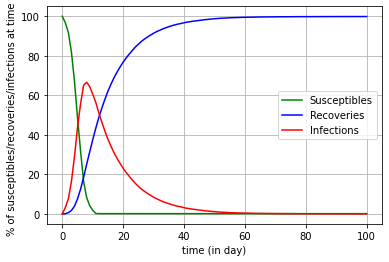

In [12]:
'Simulate the first epidemic'
beta = 10.
gamma=0.1
source = 23654
max_time = 100.
s, i, r, sir = simulate(G, beta, gamma, source, max_time)
plot(s, i, r, G.number_of_nodes())

In [13]:

#60% of the population is infected at the same time:
arg_infected = np.argwhere(i/G.number_of_nodes()>=0.6)
print("we have to wait " + str(arg_infected[0]) + " days before at least 60% of the populations is infected at the same time")

#60% of the population has recovered
arg_recovered = np.argwhere(r/G.number_of_nodes() >= 0.6)
print("we have to wait " + str(arg_recovered[0]) + " days before at least 60% of the populations has recovered")


we have to wait [7] days before at least 60% of the populations is infected at the same time
we have to wait [15] days before at least 60% of the populations has recovered


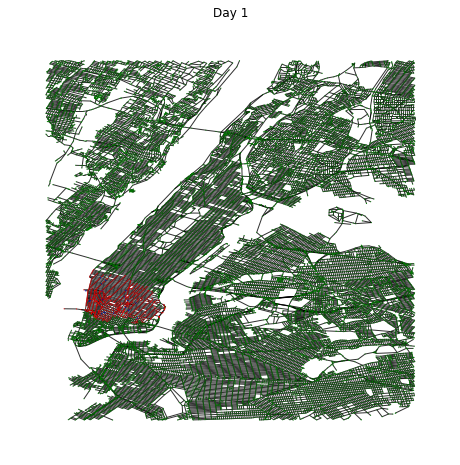

In [14]:
# at time t = 1
'plot the state of the epidemic at day 1'
'green = susceptible'
'red = infected'
'blue = recovered'
draw_graph(time=1, sir=sir)

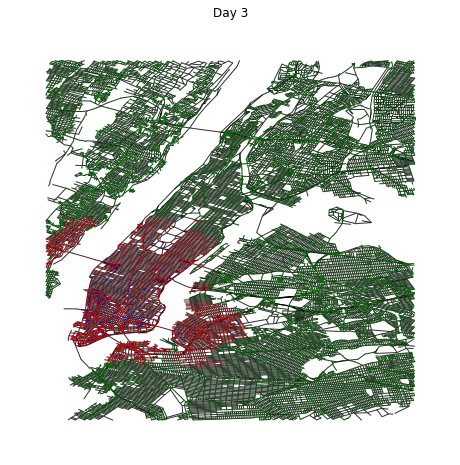

In [15]:
# at time t = 3
'plot the state of the epidemic at day 3'
'green = susceptible'
'red = infected'
'blue = recovered'
draw_graph(time=3, sir=sir)

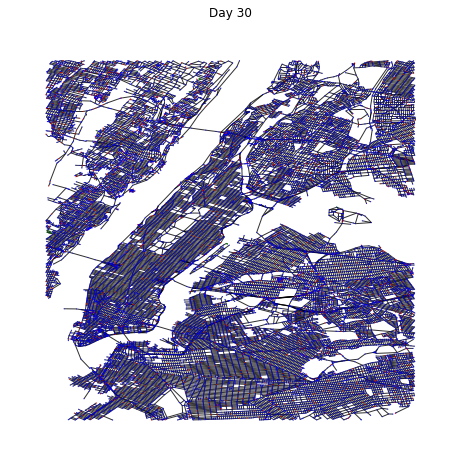

In [16]:
# at time t = 30
'plot the state of the epidemic at day 30'
'green = susceptible'
'red = infected'
'blue = recovered'

draw_graph(time=30, sir=sir)

#### exercice 2.10: strategy 1

In [17]:
import random
from random import choice

In [18]:
'The two strategy we are considering during this exercice are nearly the same: removing edge'
'budget = number of edge to remove'
'iteration = number of iteration to do (=number of epidemics to simulate)'
'beta, gamma, max_time are the same as before'
'strat = which strat do we want (strat1 = removing random edge, strat2 = removing edge in a more clever way)'
def strategy(budget, iteration, beta, gamma, max_time, strat):
    'these three arrays are the arrays on which we will sum the results'
    'of each epidemic, which we will then divide by the number of iterations to get the average '
    susceptible = np.zeros(101)
    infected = np.zeros(101)
    recovered = np.zeros(101)
    for _ in range(iteration):
        G = load()
        if strat == "strat 1":
            G = first_removal_strategy(G, budget)
        elif strat == "strat 2":
            G = second_removal_strategy(G, budget)
        else:
            break
        'Here we choose the source randomly'
        nodes = list(G.nodes)
        source = choice(nodes)
        'simulate the epidemics'
        s, i, r, sir = simulate(G,beta=beta, gamma=gamma, source=source, max_time=max_time)
        susceptible += s
        infected += i
        recovered += r
    
    return susceptible/iteration, infected/iteration, recovered/iteration

In [19]:
'remove a list of edge of a given graph'
def remove_edges(G, list_edges):
    G.remove_edges_from(list_edges)
    return G

In [20]:
'sample budget edges randomly and remove the from G'
def first_removal_strategy(G, budget):
    sample = random.sample(list(G.edges()), budget)
    return remove_edges(G, sample)

Epidemic stopped after 115.58 days | 115.58 days elapsed | 0.4% susceptible, 0.0% infected, 99.6% recovered
Epidemic stopped after 97.69 days | 97.69 days elapsed | 0.4% susceptible, 0.0% infected, 99.6% recovered
Epidemic stopped after 99.70 days | 99.70 days elapsed | 0.4% susceptible, 0.0% infected, 99.6% recovered
Epidemic stopped after 102.40 days | 102.40 days elapsed | 0.3% susceptible, 0.0% infected, 99.7% recovered
Epidemic stopped after 97.42 days | 97.42 days elapsed | 0.3% susceptible, 0.0% infected, 99.7% recovered
Epidemic stopped after 107.94 days | 107.94 days elapsed | 0.3% susceptible, 0.0% infected, 99.6% recovered
Epidemic stopped after 101.01 days | 101.01 days elapsed | 0.4% susceptible, 0.0% infected, 99.6% recovered
Epidemic stopped after 103.02 days | 103.02 days elapsed | 0.5% susceptible, 0.0% infected, 99.5% recovered
Epidemic stopped after 100.10 days | 100.10 days elapsed | 0.5% susceptible, 0.0% infected, 99.5% recovered
Epidemic stopped after 100.65 days

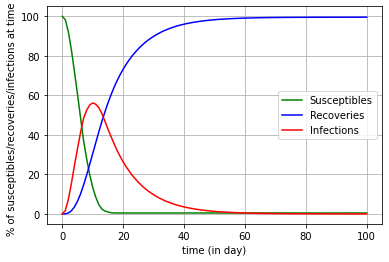

In [21]:
'simulate 20 epidemics, when removing 1000 edges'
budget = 1000
iteration = 20
beta = 10.
gamma = 0.1
max_time = 100.
mean_s, mean_i, mean_r = strategy(budget, iteration, beta, gamma, max_time, "strat 1")
plot(mean_s, mean_i, mean_r, load().number_of_nodes())

In [22]:
day = 30
print("On average, on day " + str(day) + ", " + str(mean_s[day]/(number_of_nodes_of_G)*100) + "% of people are susceptible")
print("On average, on day " + str(day) + ", " + str(mean_i[day]/(number_of_nodes_of_G)*100) + "% of people are infected")
print("On average, on day " + str(day) + ", " + str(mean_r[day]/(number_of_nodes_of_G)*100) + "% of people are recovered")

On average, on day 30, 0.47128129602356406% of people are susceptible
On average, on day 30, 9.712812960235642% of people are infected
On average, on day 30, 89.8159057437408% of people are recovered


removing 1000 edges do not change much. We can see that at the maximum number of people infected at the same time, we go from about 65% to 60%.

Epidemic stopped after 100.87 days | 100.87 days elapsed | 8.7% susceptible, 0.0% infected, 91.3% recovered
Epidemic stopped after 118.28 days | 118.28 days elapsed | 67.0% susceptible, 0.0% infected, 33.0% recovered
Epidemic stopped after 106.48 days | 106.48 days elapsed | 66.8% susceptible, 0.0% infected, 33.1% recovered
Epidemic stopped after 59.00 days | 59.00 days elapsed | 96.9% susceptible, 0.0% infected, 3.1% recovered
Epidemic stopped after 101.11 days | 101.11 days elapsed | 12.1% susceptible, 0.0% infected, 87.9% recovered
Epidemic stopped after 101.43 days | 101.43 days elapsed | 9.8% susceptible, 0.0% infected, 90.2% recovered
Epidemic stopped after 100.37 days | 100.37 days elapsed | 11.5% susceptible, 0.0% infected, 88.5% recovered
Epidemic stopped after 87.54 days | 87.54 days elapsed | 57.2% susceptible, 0.0% infected, 42.8% recovered
Epidemic stopped after 101.70 days | 101.70 days elapsed | 24.0% susceptible, 0.0% infected, 76.0% recovered
Epidemic stopped after 100

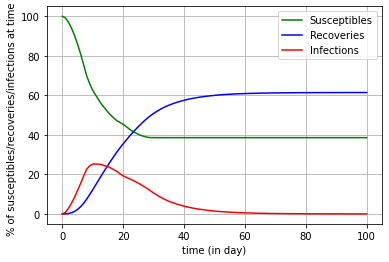

In [23]:
'same as before, but remove 10 000 edges'
budget = 10000
iteration = 20
beta = 10.
gamma = 0.1
max_time = 100.
mean_s, mean_i, mean_r = strategy(budget, iteration, beta, gamma, max_time, "strat 1")
plot(mean_s, mean_i, mean_r, load().number_of_nodes())

In [24]:
day = 30
print("On average, on day " + str(day) + ", " + str(mean_s[day]/number_of_nodes_of_G*100) + "% of people are susceptible")
print("On average, on day " + str(day) + ", " + str(mean_i[day]/number_of_nodes_of_G*100) + "% of people are infected")
print("On average, on day " + str(day) + ", " + str(mean_r[day]/number_of_nodes_of_G*100) + "% of people are recovered")

On average, on day 30, 38.59389751142328% of people are susceptible
On average, on day 30, 10.590423322382085% of people are infected
On average, on day 30, 50.81567916619463% of people are recovered


We can see that removing 10000 edges is quite effective, we can keep nearly 60% of the people susceptible. But It is not really efficient, because 10000 edges is nearly 25% of all edges, which mean that we remove a lot of edge that are "useless" in the sense that it would be more efficient to remove an edge that is a bridge or has a lot of betweeness centrality, rather than a random edge

#### Exercise 2.11: Strategy 2

In [25]:
G = load()

This strategy is a bit complex:
1) first we compute the edge_betweenness_centrality, which is a way of saying how important/often visited an edge is.
    In our case, New York is divided in 3 districts and linked with very few edges. This means that the edges that connect the 3 neighborhoods will have a very high betweenness centrality. So we will remove the top (2000 to 25000) of these edges.
    
2) After removing these edges, we remove all remaining bridges

In [26]:
def second_removal_strategy(G, budget):
    bc = nx.edge_betweenness_centrality(G,k=100)
    keys = list(bc.keys())
    values = list((bc.values()))
    biggest_n_bc = np.argsort(values)[-budget:]
    for i in biggest_n_bc:
        edge = keys[i]
        G.remove_edge(edge[0], edge[1]) 
        
    'removing all remaining bridges'
    bridges = list(nx.bridges(G))
    G.remove_edges_from(bridges)
    return G

Epidemic stopped after 120.42 days | 120.42 days elapsed | 60.0% susceptible, 0.0% infected, 40.0% recovered
Epidemic stopped after 100.33 days | 100.33 days elapsed | 59.8% susceptible, 0.0% infected, 40.2% recovered
Epidemic stopped after 110.07 days | 110.07 days elapsed | 59.7% susceptible, 0.0% infected, 40.3% recovered
Epidemic stopped after 98.24 days | 98.24 days elapsed | 68.6% susceptible, 0.0% infected, 31.4% recovered
Epidemic stopped after 103.71 days | 103.71 days elapsed | 59.6% susceptible, 0.0% infected, 40.4% recovered
Epidemic stopped after 92.53 days | 92.53 days elapsed | 88.4% susceptible, 0.0% infected, 11.6% recovered
Epidemic stopped after 100.71 days | 100.71 days elapsed | 59.9% susceptible, 0.0% infected, 40.1% recovered
Epidemic stopped after 88.74 days | 88.74 days elapsed | 88.4% susceptible, 0.0% infected, 11.6% recovered
Epidemic stopped after 0.88 days | 0.88 days elapsed | 100.0% susceptible, 0.0% infected, 0.0% recovered
Epidemic stopped after 101.81

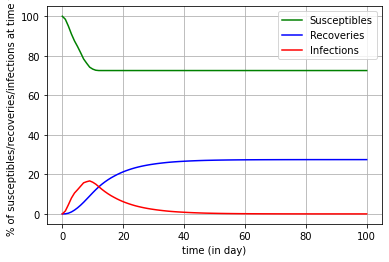

In [27]:
'simultation of 20 epidemics'
budget = 2000
iteration = 20
beta = 10.
gamma = 0.1
max_time = 100.
s, i, r = strategy(budget, iteration, beta, gamma, max_time, "strat 2")
plot(s, i, r, load().number_of_nodes())

In [28]:
day = 30
print("On average, on day " + str(day) + ", " + str(s[day]/number_of_nodes_of_G*100) + "% of people are susceptible")
print("On average, on day " + str(day) + ", " + str(i[day]/number_of_nodes_of_G*100) + "% of people are infected")
print("On average, on day " + str(day) + ", " + str(r[day]/number_of_nodes_of_G*100) + "% of people are recovered")

On average, on day 30, 72.52633963974169% of people are susceptible
On average, on day 30, 2.2718175295494887% of people are infected
On average, on day 30, 25.20184283070881% of people are recovered
